In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Data Generation

In [2]:
d = 18
n_comp = int(np.log2(d))
true_means = []
true_covs = [np.eye(2)]
data = np.array([[0., 0.]])

for _ in range(n_comp):
    true_means.append(np.random.uniform(low=-10,high=10,size=(2, )))
    data_ = np.random.multivariate_normal(true_means[-1], true_covs[-1], size=90)
    data = np.vstack([data, data_])

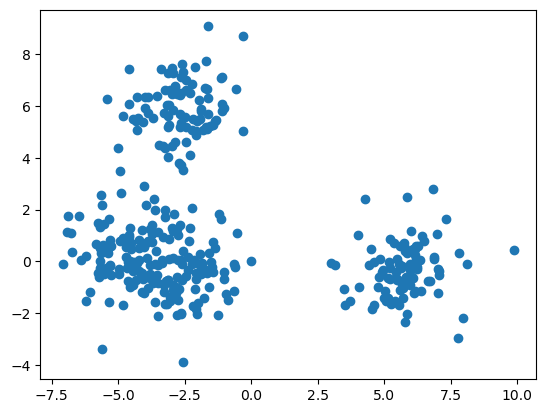

In [3]:
plt.scatter(data[:, 0], data[:, 1])

## EM algorithm

### Expectation-Maximization Algorithm for Gaussian Mixture Models

The Expectation-Maximization (EM) algorithm is an iterative method for finding the maximum likelihood estimates of parameters in statistical models, particularly useful for unsupervised learning tasks like clustering. In the context of Gaussian Mixture Models (GMM), the EM algorithm iteratively optimizes the parameters of multiple Gaussian distributions to fit the observed data.

#### Algorithm Steps:

1. **Initialization**: Start by initializing the parameters of the Gaussian components: means, covariances, and mixing coefficients.

2. **Expectation Step (E-step)**:
   - Compute the responsibilities (likelihoods) of each data point belonging to each Gaussian component.
   - Responsibilities are computed based on the current parameters using the multivariate normal distribution.

3. **Maximization Step (M-step)**:
   - Update the parameters (means, covariances, and mixing coefficients) using the responsibilities computed in the E-step.
   - Expressions for updating parameters:
     - **Means**: Weighted average of data points using responsibilities.
     - **Covariances**: Weighted covariance matrix of data points using responsibilities.
     - **Mixing Coefficients**: Mean of responsibilities.

4. **Compute Log-Likelihood**:
   - Compute the log-likelihood of the data given the current parameters and responsibilities.
   - Log-likelihood serves as a measure of how well the model fits the data.

5. **Convergence Check**:
   - Iterate between the E-step and M-step until convergence, typically based on a convergence criterion such as changes in log-likelihood or parameter values.

#### Expressions for Updating Parameters:

- **Means**: 

$$ \mu_k = \frac{\sum_{i=1}^{N} \gamma(z_{ik}) \cdot x_i}{\sum_{i=1}^{N} \gamma(z_{ik})} $$

- **Covariances**:
  $$ \Sigma_k = \frac{\sum_{i=1}^{N} \gamma(z_{ik}) \cdot (x_i - \mu_k)(x_i - \mu_k)^T}{\sum_{i=1}^{N} \gamma(z_{ik})} $$

- **Mixing Coefficients**:
  $$ \pi_k = \frac{\sum_{i=1}^{N} \gamma(z_{ik})}{N} $$

Here, $ \gamma(z_{ik}) $ represents the responsibility of data point $ x_i $ belonging to Gaussian component $ k $.



In [4]:
import numpy as np
from scipy.stats import multivariate_normal

def initialize_parameters(data, num_components):
    num_data_points, num_features = data.shape
    # Initialize means randomly
    means = np.random.rand(num_components, num_features)
    # Initialize covariances as identity matrices
    covariances = [np.eye(num_features)] * num_components
    # Initialize mixing coefficients uniformly
    mixing_coefficients = np.ones(num_components) / num_components
    return means, covariances, mixing_coefficients

def expectation_step(data, means, covariances, mixing_coefficients):
    num_data_points = len(data)
    num_components = len(means)
    responsibilities = np.zeros((num_data_points, num_components))

    for i in range(num_data_points):
        for j in range(num_components):
            responsibilities[i, j] = mixing_coefficients[j] * multivariate_normal.pdf(data[i], means[j], covariances[j])

    # Normalize the responsibilities
    responsibilities /= responsibilities.sum(axis=1)[:, np.newaxis]

    return responsibilities

def maximization_step(data, responsibilities):
    num_data_points, num_components = responsibilities.shape
    num_features = data.shape[1]
    means = np.zeros((num_components, num_features))
    covariances = [np.zeros((num_features, num_features))] * num_components
    mixing_coefficients = np.zeros(num_components)

    for j in range(num_components):
        # Update means
        means[j] = np.sum(responsibilities[:, j][:, np.newaxis] * data, axis=0) / np.sum(responsibilities[:, j])

        # Update covariances
        diff = data - means[j]
        covariances[j] = np.dot((responsibilities[:, j][:, np.newaxis] * diff).T, diff) / np.sum(responsibilities[:, j])

        # Update mixing coefficients
        mixing_coefficients[j] = np.mean(responsibilities[:, j])

    return means, covariances, mixing_coefficients

def em_algorithm(data, num_components, max_iterations=100, tolerance=1e-60):
    means, covariances, mixing_coefficients = initialize_parameters(data, num_components)
    prev_log_likelihood = float('-inf')

    for iteration in range(max_iterations):
        responsibilities = expectation_step(data, means, covariances, mixing_coefficients)
        means, covariances, mixing_coefficients = maximization_step(data, responsibilities)

        # Compute log-likelihood
        log_likelihood = np.sum(np.log(np.sum(responsibilities, axis=1)))
        print(f"Likelihood difference: {log_likelihood - prev_log_likelihood}")

        # Check for convergence
        if abs(log_likelihood - prev_log_likelihood) < tolerance:
            break

        prev_log_likelihood = log_likelihood

    return means, covariances, mixing_coefficients

num_components = n_comp # Number of Gaussian components
means, covariances, mixing_coefficients = em_algorithm(data, num_components)
print("Means:", means)
print("Covariances:", covariances)
print("Mixing Coefficients:", mixing_coefficients)

Likelihood difference: inf
Likelihood difference: 2.7755575615628914e-15
Likelihood difference: 1.4432899320127039e-15
Likelihood difference: -2.1094237467877974e-15
Likelihood difference: -7.771561172376092e-16
Likelihood difference: 1.1102230246251487e-16
Likelihood difference: -2.2204460492503052e-16
Likelihood difference: -3.3306690738754696e-16
Likelihood difference: 6.661338147750939e-16
Likelihood difference: -2.220446049250313e-15
Likelihood difference: -4.440892098500626e-16
Likelihood difference: 1.3322676295501878e-15
Likelihood difference: -9.992007221626409e-16
Likelihood difference: 1.6653345369377348e-15
Likelihood difference: -6.661338147750939e-16
Likelihood difference: -4.440892098500626e-16
Likelihood difference: -6.661338147750939e-16
Likelihood difference: 5.551115123125783e-16
Likelihood difference: -3.552713678800501e-15
Likelihood difference: 4.773959005888173e-15
Likelihood difference: -1.5543122344752192e-15
Likelihood difference: 6.661338147750939e-16
Likelih

In [30]:
true_means

[array([-2.41861803,  8.70189561]),
 array([-0.68827327,  5.45042023]),
 array([-9.05171632,  5.09111548]),
 array([-0.522462  , -1.87261415])]

MALA

In [32]:
def metropolis_hastings_langevin(U, grad_U, epsilon, L, current_state, num_samples):
    """
    Metropolis-Hastings Langevin sampling algorithm.
    
    Parameters:
        U (function): Potential energy function.
        grad_U (function): Gradient of the potential energy function.
        epsilon (float): Step size for Langevin dynamics.
        L (int): Number of leapfrog steps for Langevin dynamics.
        current_state (ndarray): Initial state of the system.
        num_samples (int): Number of samples to generate.
        
    Returns:
        samples (list): List of generated samples.
    """
    samples = []
    current_energy = U(current_state)
    
    for _ in range(num_samples):
        # Propose a new state using Langevin dynamics
        proposed_state = langevin_dynamics(grad_U, epsilon, L, current_state)
        proposed_energy = U(proposed_state)
        
        # Accept or reject the proposed state based on the Metropolis-Hastings criterion
        acceptance_prob = min(1, np.exp(current_energy - proposed_energy))
        if np.random.rand() < acceptance_prob:
            current_state = proposed_state
            current_energy = proposed_energy
        
        samples.append(current_state)
    
    return samples

def langevin_dynamics(grad_U, epsilon, L, current_state):
    """
    Langevin dynamics algorithm for proposing new states.
    
    Parameters:
        grad_U (function): Gradient of the potential energy function.
        epsilon (float): Step size for Langevin dynamics.
        L (int): Number of leapfrog steps for Langevin dynamics.
        current_state (ndarray): Current state of the system.
        
    Returns:
        new_state (ndarray): New proposed state.
    """
    new_state = current_state.copy()
    momentum = np.random.normal(size=current_state.shape)
    
    for _ in range(L):
        momentum -= epsilon * grad_U(new_state) / 2
        new_state += epsilon * momentum
        momentum -= epsilon * grad_U(new_state) / 2
    
    return new_state
